In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import gc
import pandas as pd
import numpy as np
import torch
import datetime
from tqdm import tqdm_notebook
from torch import nn
from torchvision import transforms
from cnn_finetune import make_model

import model as M
import model2 as M2
from dataset import SegmentationDataset, SegmentationInferenceDataset
from data import *
from util import *

In [7]:
torch.cuda.is_available()
device = torch.device('cuda')

# U-Net testing

In [9]:
_, val_df, test_df = get_dfs()

In [5]:
gc.collect()
torch.cuda.empty_cache()

model = M.UNet(1, n_classes=1)
weight = torch.load(str(model_dir / 'unet_test_dict.model'))
model.load_state_dict(weight)
model = model.to(device)

In [11]:
val_dataset = SegmentationInferenceDataset(val_df, input_size=(128, 128), with_gt=True, with_raw_input=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


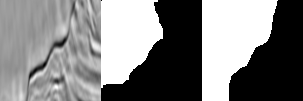

In [18]:
raw_im, im, mask = val_dataset[10]
pred = predict(model, im, device)
show_prediction(raw_im, pred, mask)

In [19]:
val_iter = iter(val_loader)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


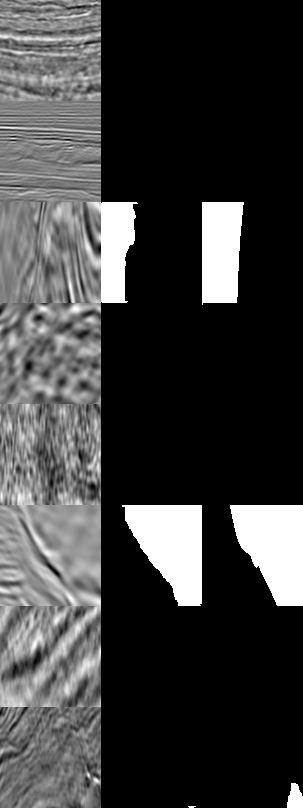

In [20]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


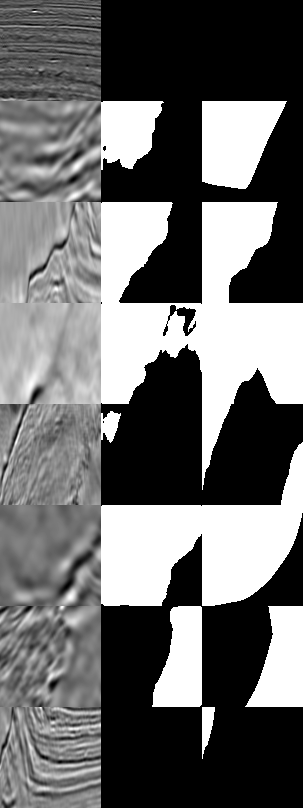

In [21]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


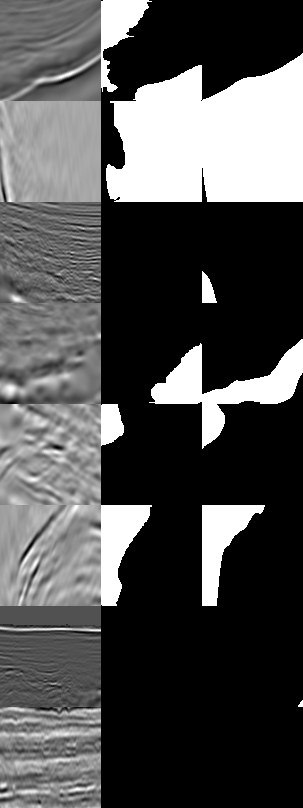

In [22]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


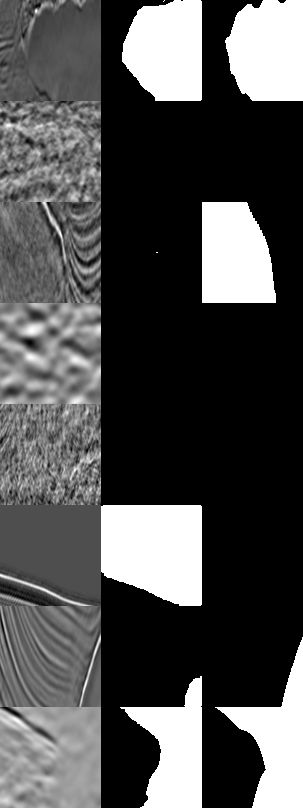

In [23]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

# U-Net Res

In [24]:
_, val_df, test_df = get_dfs()

In [25]:
gc.collect()
torch.cuda.empty_cache()

model = M.UNetRes(1, n_classes=1)
weight = torch.load(str(model_dir / 'unet_resblock_dict.model'))
model.load_state_dict(weight)
model = model.to(device)

In [26]:
val_dataset = SegmentationInferenceDataset(val_df, input_size=(128, 128), with_gt=True, with_raw_input=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

In [27]:
val_iter = iter(val_loader)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


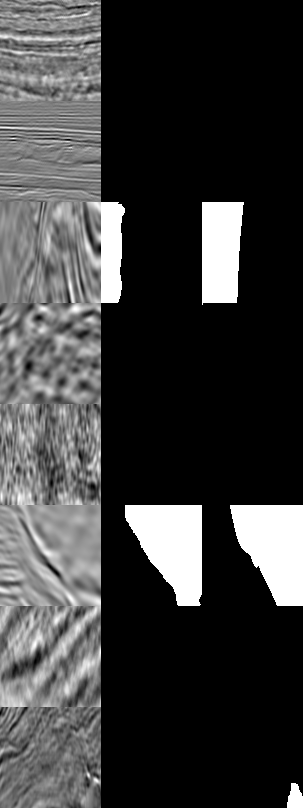

In [28]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


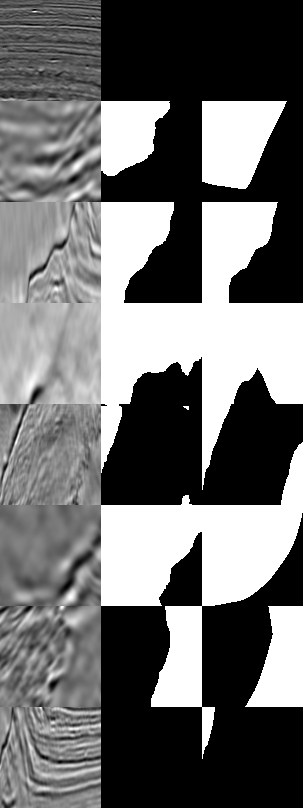

In [29]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


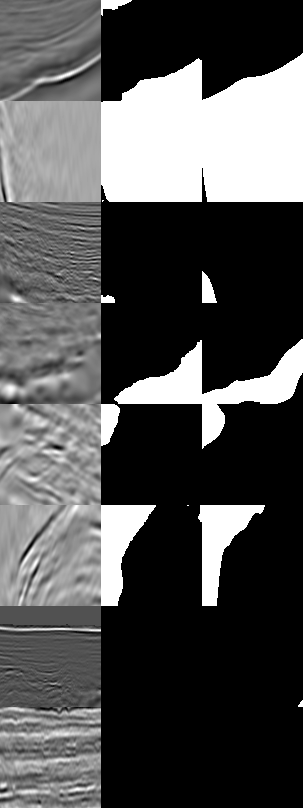

In [30]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


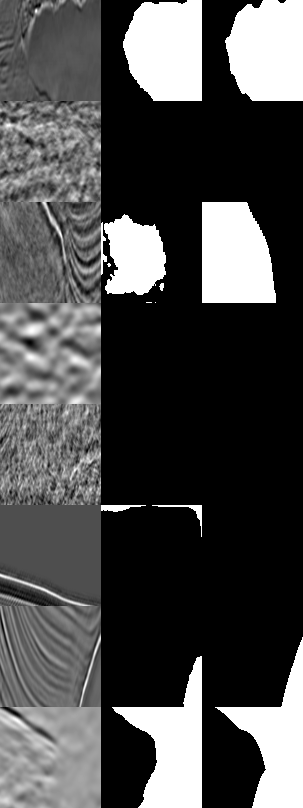

In [31]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

# UNet Res BCELoss SGD 3ch

In [5]:
_, val_df, test_df = get_dfs()

In [20]:
gc.collect()
torch.cuda.empty_cache()

model = M.UNetRes(3, n_classes=1)
weight = torch.load(str(model_dir / 'unet_res_bceloss_sgd_3ch_dict.model'))
model.load_state_dict(weight)
model = model.to(device)
model.eval()

UNetRes(
  (inc): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): BasicResBlock(
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Sequential(
          (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
  )
  (down2): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0,

In [21]:
val_dataset = SegmentationInferenceDataset(val_df, input_size=(128, 128), with_gt=True, with_raw_input=True, use_depth_channels=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

In [22]:
val_iter = iter(val_loader)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


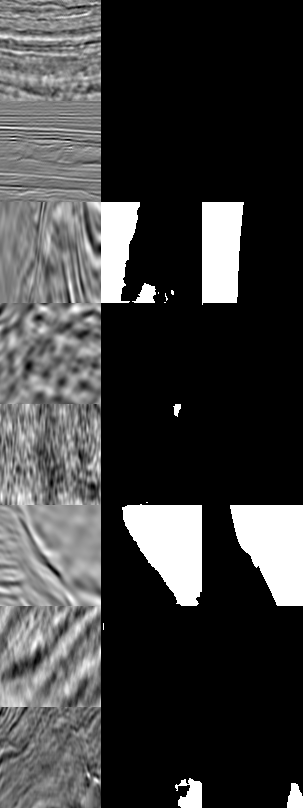

In [23]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


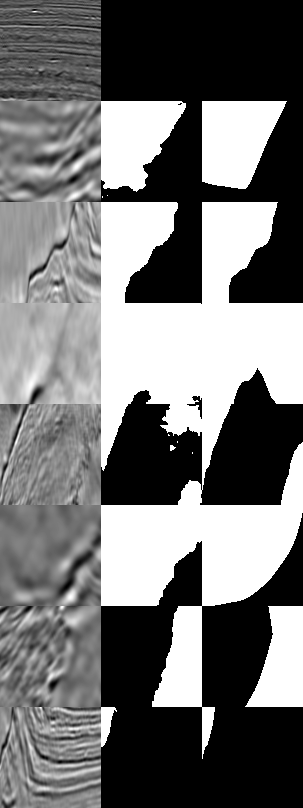

In [24]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


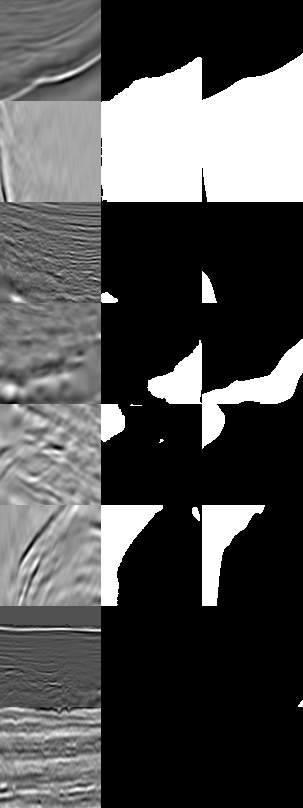

In [25]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


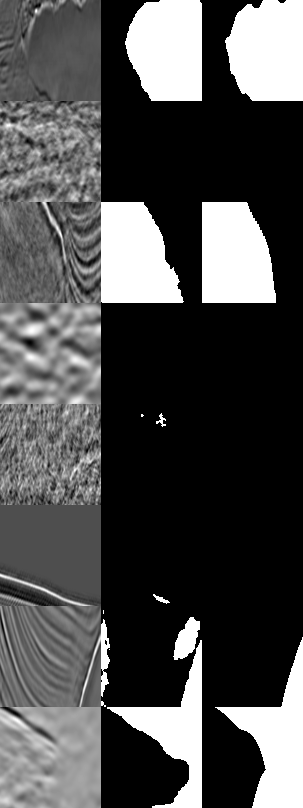

In [26]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

# UNetRes lovasz SGD 3ch

In [5]:
_, val_df, test_df = get_dfs()

In [6]:
gc.collect()
torch.cuda.empty_cache()

model = M.UNetRes(3, n_classes=1)
weight = torch.load(str(model_dir / 'unet_res_lovaszloss_sgd_3ch_dict.model'))
model.load_state_dict(weight)
model = model.to(device)
model.eval()

UNetRes(
  (inc): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): BasicResBlock(
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Sequential(
          (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
  )
  (down2): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0,

In [7]:
val_dataset = SegmentationInferenceDataset(val_df, input_size=(128, 128), with_gt=True, with_raw_input=True, use_depth_channels=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

In [8]:
val_iter = iter(val_loader)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


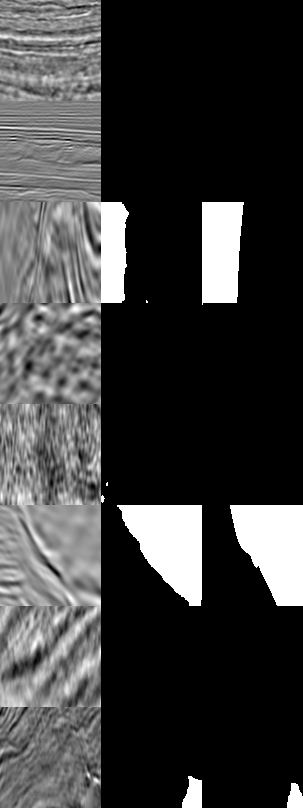

In [9]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


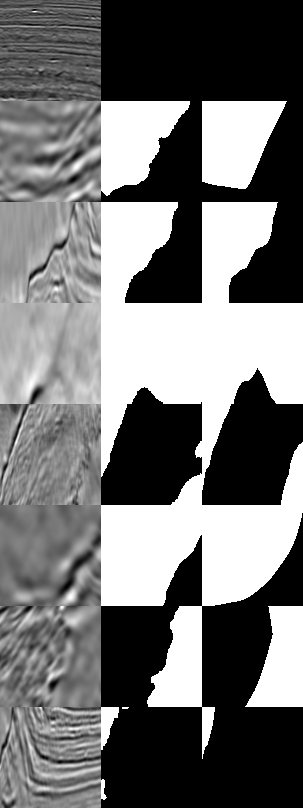

In [10]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


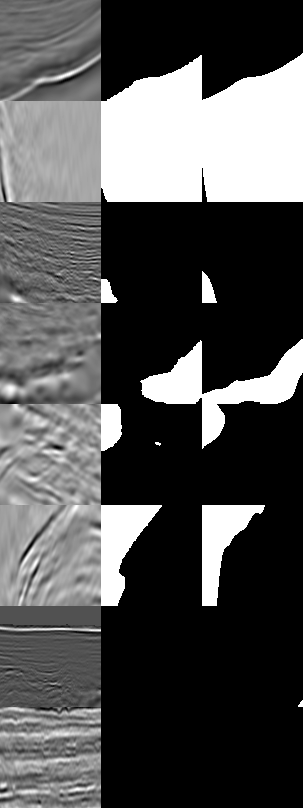

In [11]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


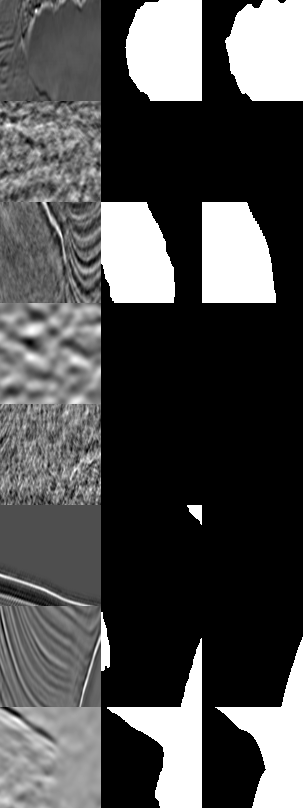

In [12]:
im, x, t = next(val_iter)
pred = predict(model, x, device)
show_prediction(im, pred, t)

# UNetRes lovasz SGD 3ch (with TTA)

In [14]:
_, val_df, test_df = get_dfs()

In [15]:
gc.collect()
torch.cuda.empty_cache()

model = M.UNetRes(3, n_classes=1)
weight = torch.load(str(model_dir / 'unet_res_lovaszloss_sgd_3ch_dict.model'))
model.load_state_dict(weight)
model = model.to(device)
model.eval()

UNetRes(
  (inc): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): BasicResBlock(
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Sequential(
          (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
  )
  (down2): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0,

In [16]:
val_dataset = SegmentationInferenceDataset(val_df, input_size=(128, 128), with_gt=True, with_raw_input=True, use_depth_channels=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

In [17]:
val_iter = iter(val_loader)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


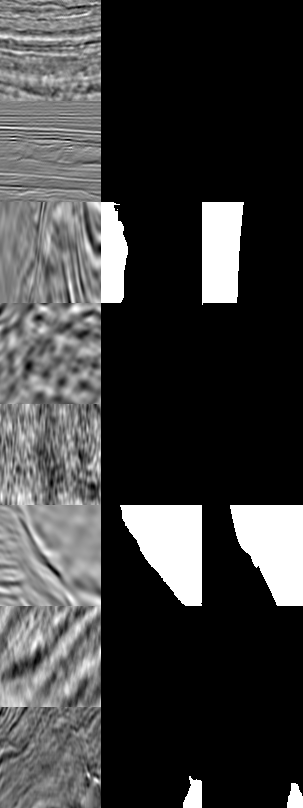

In [18]:
im, x, t = next(val_iter)
pred = predict(model, x, device, use_sigmoid=False, threshold=0.0, with_tta=True)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


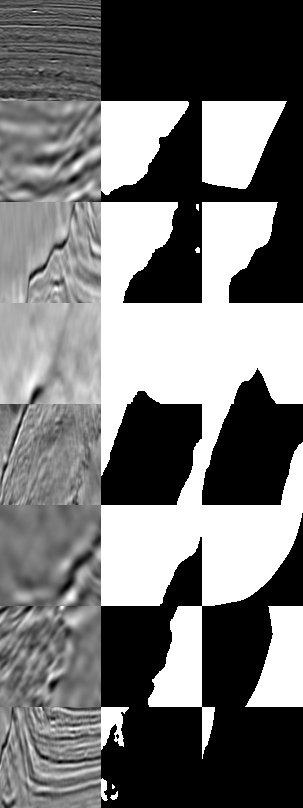

In [19]:
im, x, t = next(val_iter)
pred = predict(model, x, device, use_sigmoid=False, threshold=0.0, with_tta=True)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


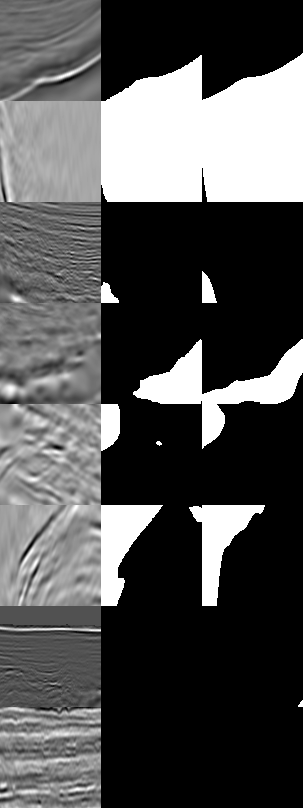

In [20]:
im, x, t = next(val_iter)
pred = predict(model, x, device, use_sigmoid=False, threshold=0.0, with_tta=True)
show_prediction(im, pred, t)

D:\Users\ns\Anaconda3\envs\chainer\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


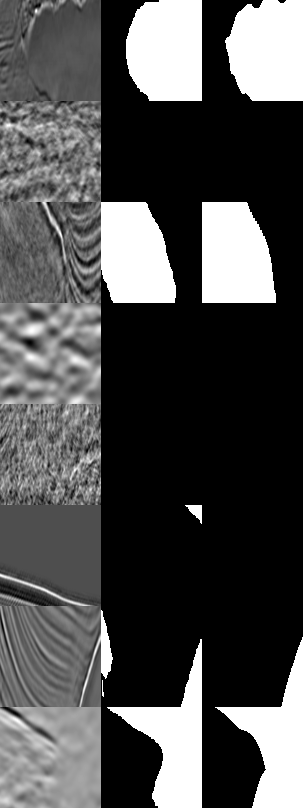

In [21]:
im, x, t = next(val_iter)
pred = predict(model, x, device, use_sigmoid=False, threshold=0.0, with_tta=True)
show_prediction(im, pred, t)

# UNetRes34 model2

In [13]:
_, val_df, test_df = get_dfs()

In [15]:
val_dataset = SegmentationInferenceDataset(val_df, input_size=(128, 128), with_aux_label=True,
                                           with_gt=True, with_raw_input=True, use_depth_channels=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False)

In [17]:
val_iter = iter(val_loader)

In [55]:
im, x, t, label = next(val_iter)

In [56]:
label

tensor([2, 2, 2, 0, 0, 1, 0, 2])

In [47]:
label

tensor([1, 0, 2, 2, 0, 2, 2, 0])

In [54]:
show_prediction(im, im)

TypeError: pic should be Tensor or ndarray. Got <class 'numpy.ndarray'>.